### Random Forest Algorithm

#### 1.Import the libraries.

In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### 2. Import the dataset

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 3. Assigning Feature Variable to X and Target variable to y

In [6]:
# Putting feature variable to X
X = df.drop('Outcome', axis=1)

# Putting target variable to y
y = df['Outcome']

In [7]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### 4. Perform Train-Test-Split

In [8]:
# lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [9]:
X_train.shape, X_test.shape

((537, 8), (231, 8))

#### 5. Import Random Forest Classifier and fit the data

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [15]:
# checking the oob score
rf_classifier.oob_score_

0.7597765363128491

#### 6. Hyperparameter tuning for Random Forest using GridSearchCV

In [17]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20,25],
    'min_samples_leaf': [5,10,20,50,100,200,250],
    'n_estimators': [10,25,30,50,100,150,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
gscv = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

gscv.fit(X_train, y_train)

Fitting 4 folds for each of 294 candidates, totalling 1176 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 25],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200, 250],
                         'n_estimators': [10, 25, 30, 50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [19]:
gscv.best_score_

0.7783305693753455

In [20]:
rf_best_model = gscv.best_estimator_
rf_best_model

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

#### 7. Visualization

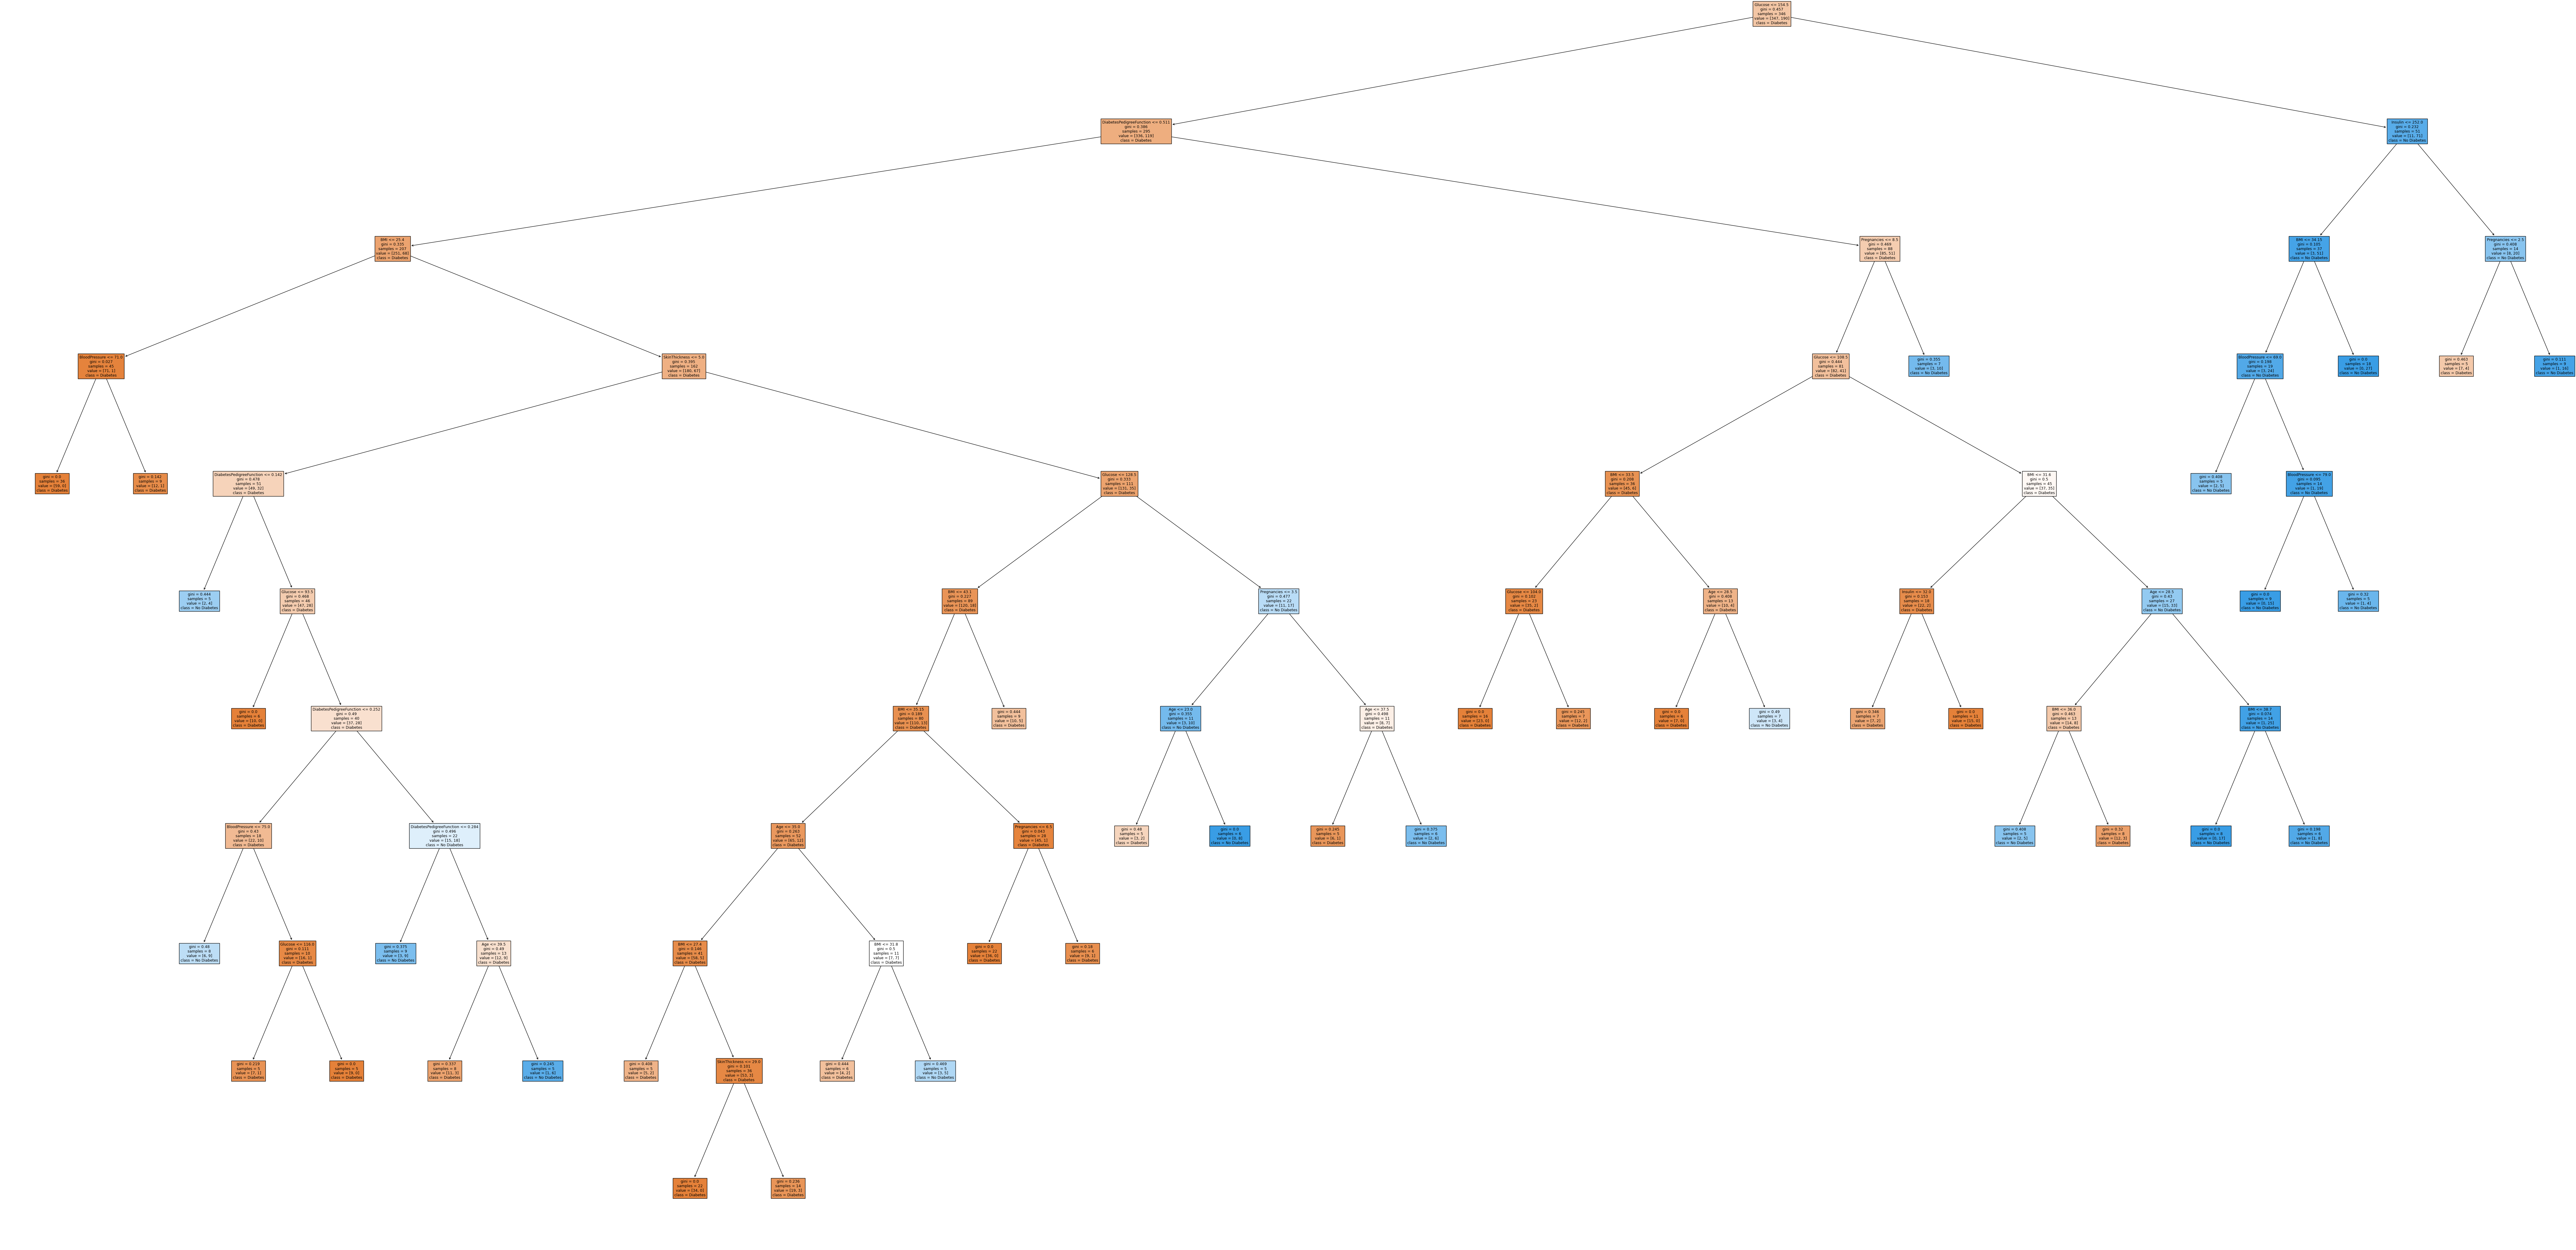

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best_model.estimators_[5], feature_names = X.columns,class_names=['Diabetes', "No Diabetes"],filled=True);
plt.savefig("RF_diabetes_est5.png")

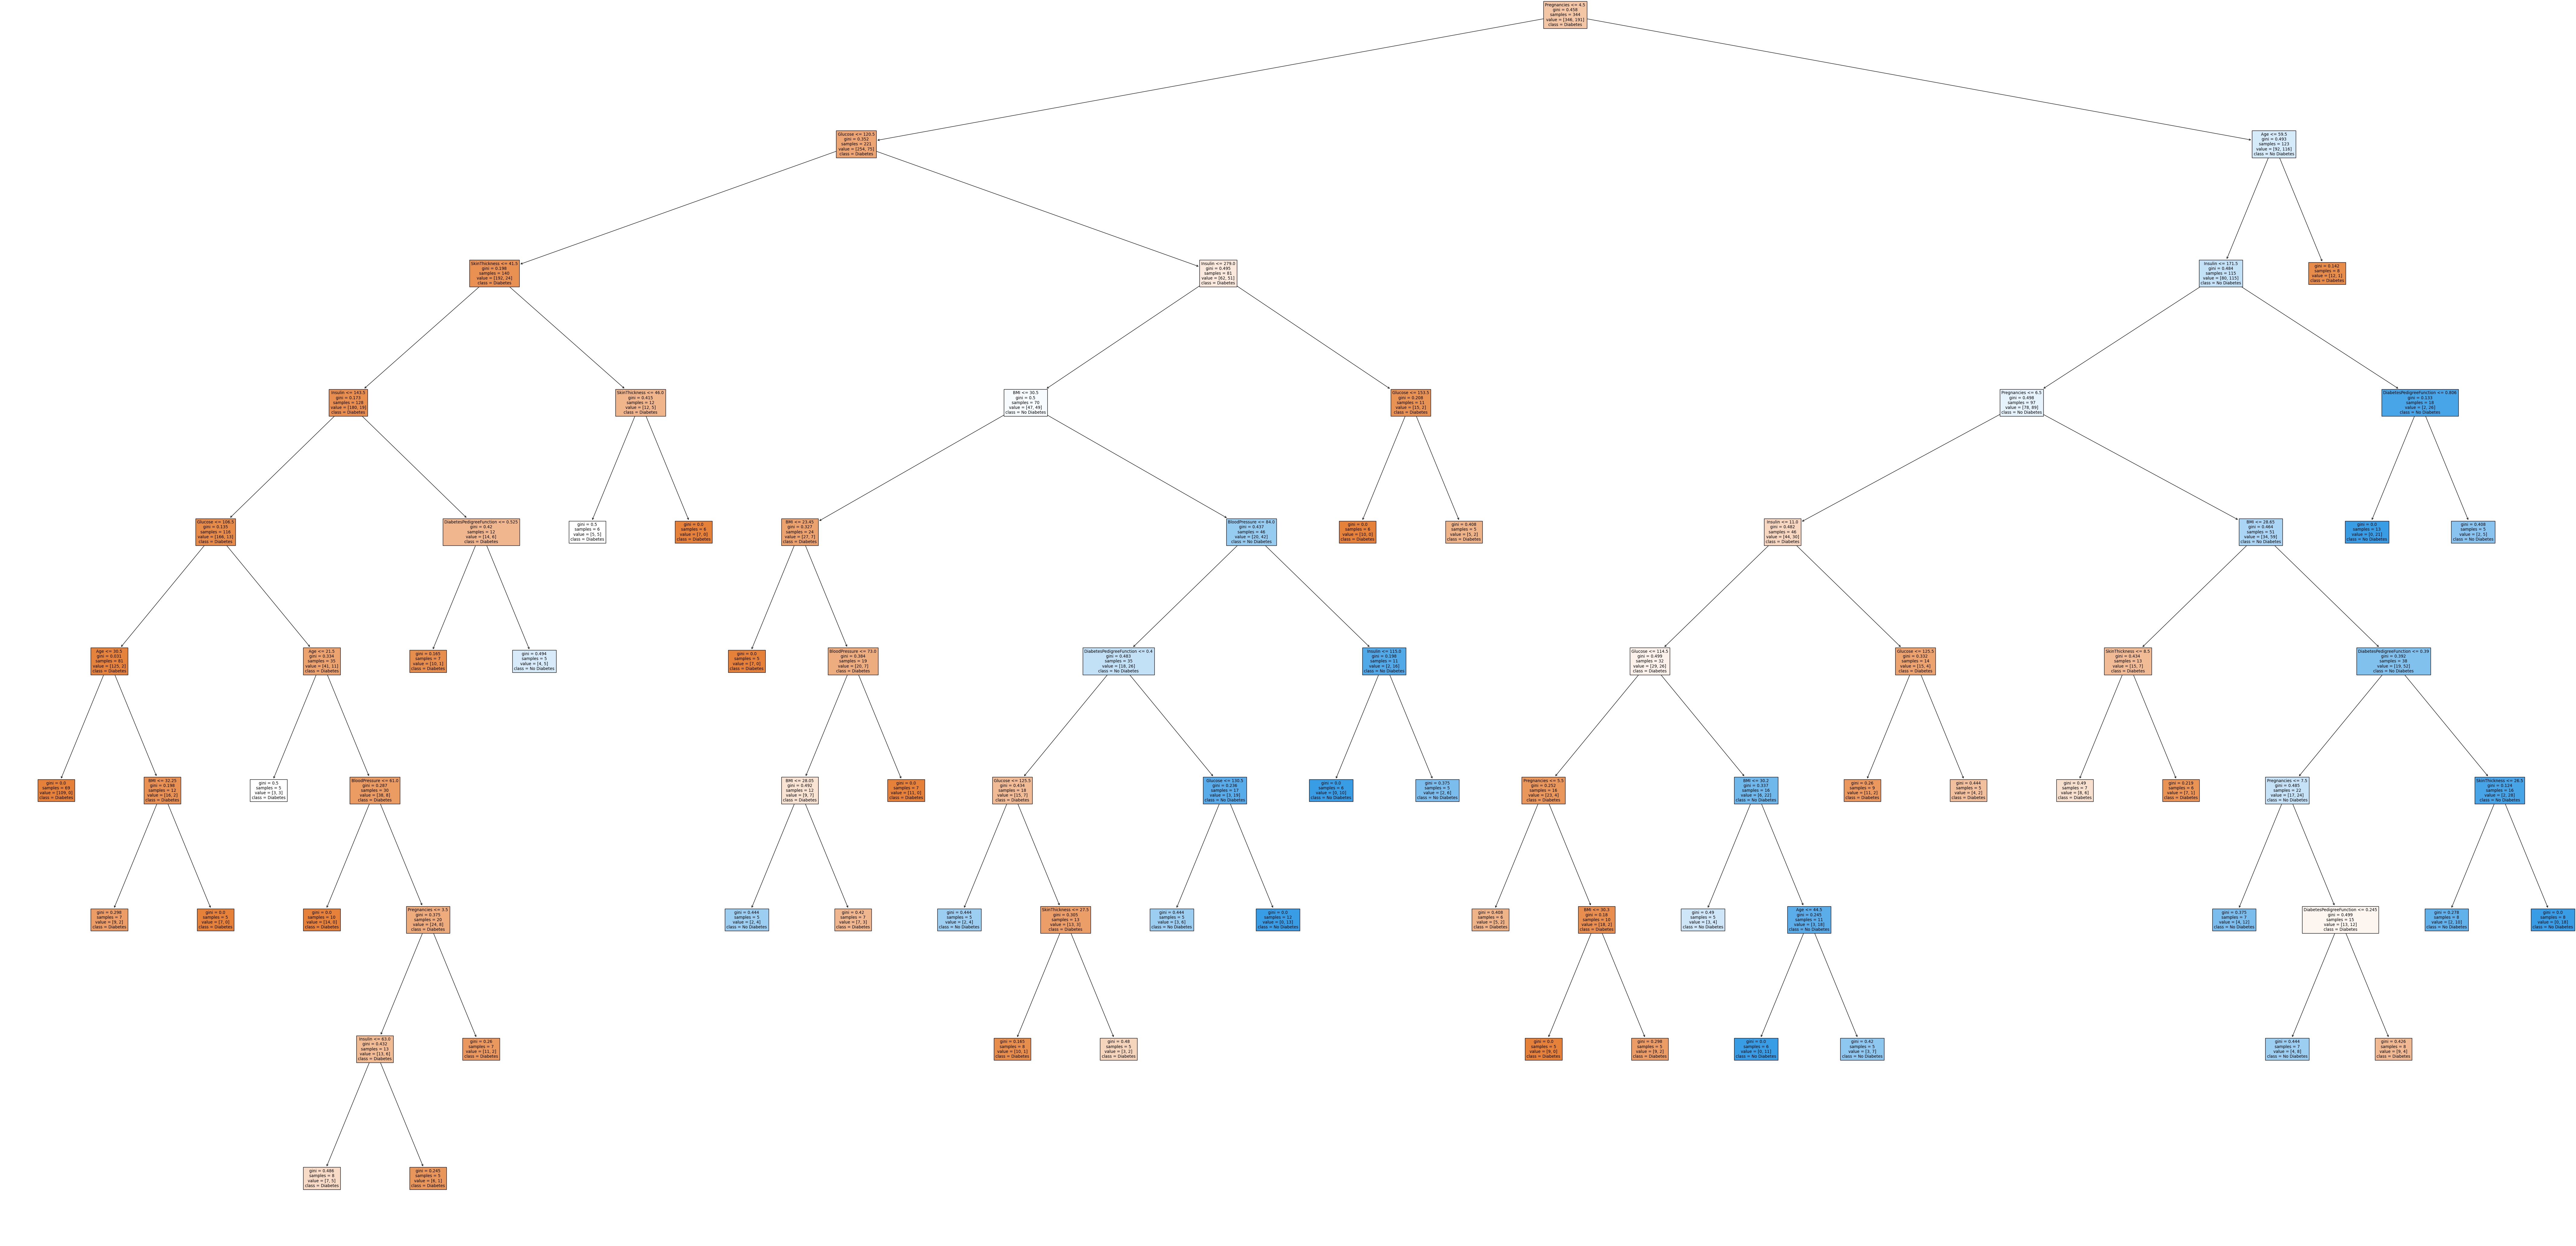

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best_model.estimators_[7], feature_names = X.columns,class_names=['Diabetes', "No Diabetes"],filled=True);
plt.savefig("RF_diabetes_est7.png")

#### 8. Sorting the data with the help of feature importance

In [25]:
rf_best_model.feature_importances_

array([0.07890559, 0.34057573, 0.06480301, 0.0536598 , 0.0655704 ,
       0.17876626, 0.06935939, 0.14835982])

In [27]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best_model.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,Glucose,0.340576
5,BMI,0.178766
7,Age,0.148360
0,Pregnancies,0.078906
6,DiabetesPedigreeFunction,0.069359
4,Insulin,0.065570
2,BloodPressure,0.064803
3,SkinThickness,0.053660


#### Key Takeaways